In [1]:
import pandas as pd
open_source_8500 = pd.read_excel("../data/open_source_8500.xlsx") ## 舊名 IT-Ticket-Classification.xlsx
open_source_8500

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [2]:
import torch
import numpy as np

device=torch.device('cuda:0')
torch.cuda.get_device_name(0)

seed=123
torch.manual_seed(seed)
np.random.seed(seed)

# Paper步驟

In [3]:
callers = open_source_8500['Caller'].unique() 
callers.shape
# 合併欄位：將 Short description 和 Description 連結
open_source_8500["Description"] = open_source_8500["Short description"].astype(str) + " " + open_source_8500["Description"].astype(str)

open_source_8500.drop(["Caller",'Short description'],axis=1,inplace= True)
open_source_8500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8500 non-null   object
 1   Assignment group  8500 non-null   object
dtypes: object(2)
memory usage: 132.9+ KB


In [4]:
targetClassCnt=open_source_8500['Assignment group'].value_counts()
targetClassCnt.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: count, dtype: float64

In [5]:
## 將樣本數少於10的組別歸類為一個新的組別 misc_grp

sample = open_source_8500.groupby(['Assignment group'])
regroup = []

for grp in open_source_8500['Assignment group'].unique():
    if sample.get_group((grp,)).shape[0] < 10:  # 改為元組形式 (grp,)
        regroup.append(grp)

print('Found {} groups which have under 10 samples'.format(len(regroup)))
open_source_8500['Assignment group'] = open_source_8500['Assignment group'].apply(
    lambda x: 'misc_grp' if x in regroup else x
)

# Unique Groups check 
open_source_8500['Assignment group'].unique()

Found 25 groups which have under 10 samples


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'misc_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

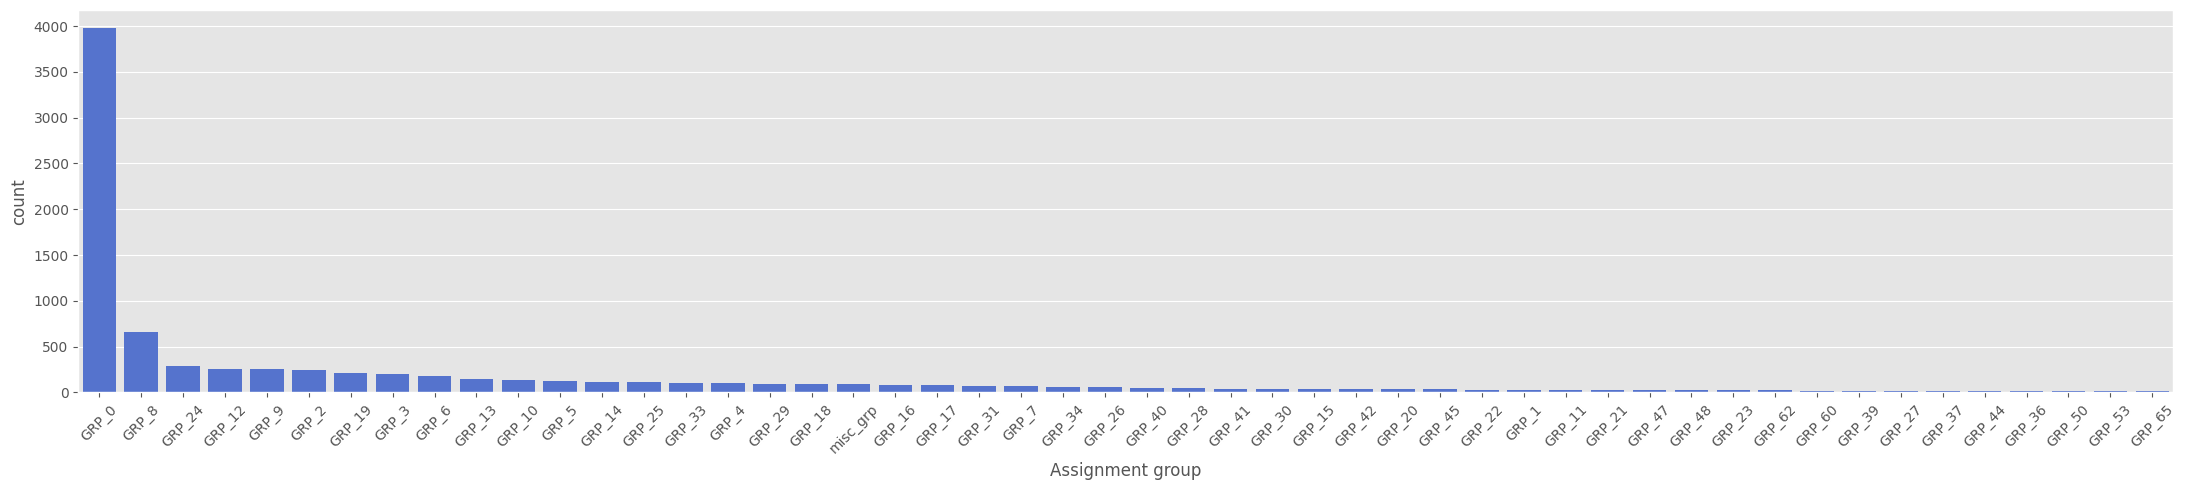

In [6]:
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

descending_order = open_source_8500['Assignment group'].value_counts().sort_values(ascending=False).index

plt.subplots(figsize=(22, 5))
ax = sns.countplot(x='Assignment group', data=open_source_8500, color='royalblue', order=descending_order)
ax.tick_params(axis='x', rotation=45)  # 設置旋轉

plt.tight_layout()
plt.show()

In [7]:
#Fill 'Decsription' field entries that have null with blank space
open_source_8500['Description'] = open_source_8500['Description'].fillna(' ')

In [8]:
open_source_8500

,Description,Assignment group
0,login issue -verified user details.(employee# ...,GRP_0
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,GRP_0
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...,GRP_0
3,unable to access hr_tool page unable to access...,GRP_0
4,skype error skype error,GRP_0
...,...,...
8495,emails not coming in from zz mail _x000D_\n_x0...,GRP_29
8496,telephony_software issue telephony_software issue,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,GRP_0
8498,machine nÃ£o estÃ¡ funcionando i am unable to ...,GRP_62


# paper Description處理

In [9]:
import re 
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
open_source_8500['Description'] = open_source_8500['Description'].apply(clean_data)
open_source_8500

,Description,Assignment group
0,login issue verified user details employee and...,GRP_0
1,outlook xd xd xd hello team xd xd my meetings ...,GRP_0
2,cant log in to vpn xd xd xd hi xd xd cannot lo...,GRP_0
3,unable to access hr tool page unable to access...,GRP_0
4,skype error skype error,GRP_0
...,...,...
8495,emails not coming in from zz mail xd xd xd goo...,GRP_29
8496,telephony software issue telephony software issue,GRP_0
8497,vip windows password reset for tifpdchb pedxru...,GRP_0
8498,machine o est funcionando am unable to access ...,GRP_62


In [10]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [11]:
open_source_8500.reset_index(drop=True,inplace=True)

open_source_8500['cleanText']=open_source_8500['Description'].map(lambda s:preprocess(s))

open_source_8500['cleanText']

0       login issue verified user details employee man...
1       outlook hello team meetings skype meetings etc...
2                        cant log vpn cannot log vpn best
3         unable access tool page unable access tool page
4                                 skype error skype error
                              ...                        
8495    emails coming mail good afternoon receiving em...
8496    telephony software issue telephony software issue
8497    vip windows password reset tifpdchb pedxruyf v...
8498    machine est funcionando unable access machine ...
8499    mehreren lassen sich verschiedene prgramdntyme...
Name: cleanText, Length: 8500, dtype: object

In [12]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(itTicketOthersDF_resampled['Assignment group'])
#otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(otherGrpsResampled['Assignment group'])
#itTicketDF_resampled['Assignment group'] , grp_mapping_all_resampled= labelencoder(itTicketDF_resampled['Assignment group'])
open_source_8500['Assignment_group_label'],grp_mapping_all_raw = labelencoder(open_source_8500['Assignment group'])

In [13]:
open_source_8500

,Description,Assignment group,cleanText,Assignment_group_label
0,login issue verified user details employee and...,GRP_0,login issue verified user details employee man...,0
1,outlook xd xd xd hello team xd xd my meetings ...,GRP_0,outlook hello team meetings skype meetings etc...,0
2,cant log in to vpn xd xd xd hi xd xd cannot lo...,GRP_0,cant log vpn cannot log vpn best,0
3,unable to access hr tool page unable to access...,GRP_0,unable access tool page unable access tool page,0
4,skype error skype error,GRP_0,skype error skype error,0
...,...,...,...,...
8495,emails not coming in from zz mail xd xd xd goo...,GRP_29,emails coming mail good afternoon receiving em...,22
8496,telephony software issue telephony software issue,GRP_0,telephony software issue telephony software issue,0
8497,vip windows password reset for tifpdchb pedxru...,GRP_0,vip windows password reset tifpdchb pedxruyf v...,0
8498,machine o est funcionando am unable to access ...,GRP_62,machine est funcionando unable access machine ...,44


In [14]:
rows_with_nan = open_source_8500[open_source_8500['cleanText'] == '']
rows_with_nan

,Description,Assignment group,cleanText,Assignment_group_label
1081,,GRP_48,,38
1178,,GRP_30,,24
1271,fe fe,GRP_30,,24
1452,,GRP_30,,24
1700,,GRP_48,,38
1701,,GRP_48,,38
1704,,GRP_48,,38
1710,,GRP_48,,38
1711,,GRP_48,,38
1860,s s,GRP_0,,0


In [15]:
open_source_8500 = open_source_8500[open_source_8500['cleanText'].str.strip() != '']
open_source_8500

,Description,Assignment group,cleanText,Assignment_group_label
0,login issue verified user details employee and...,GRP_0,login issue verified user details employee man...,0
1,outlook xd xd xd hello team xd xd my meetings ...,GRP_0,outlook hello team meetings skype meetings etc...,0
2,cant log in to vpn xd xd xd hi xd xd cannot lo...,GRP_0,cant log vpn cannot log vpn best,0
3,unable to access hr tool page unable to access...,GRP_0,unable access tool page unable access tool page,0
4,skype error skype error,GRP_0,skype error skype error,0
...,...,...,...,...
8495,emails not coming in from zz mail xd xd xd goo...,GRP_29,emails coming mail good afternoon receiving em...,22
8496,telephony software issue telephony software issue,GRP_0,telephony software issue telephony software issue,0
8497,vip windows password reset for tifpdchb pedxru...,GRP_0,vip windows password reset tifpdchb pedxruyf v...,0
8498,machine o est funcionando am unable to access ...,GRP_62,machine est funcionando unable access machine ...,44


In [16]:
# Using itTicketDF_resampled dataset 
# df=itTicketDF_resampled
df=open_source_8500
df = df[df['cleanText'].notnull()]
df

,Description,Assignment group,cleanText,Assignment_group_label
0,login issue verified user details employee and...,GRP_0,login issue verified user details employee man...,0
1,outlook xd xd xd hello team xd xd my meetings ...,GRP_0,outlook hello team meetings skype meetings etc...,0
2,cant log in to vpn xd xd xd hi xd xd cannot lo...,GRP_0,cant log vpn cannot log vpn best,0
3,unable to access hr tool page unable to access...,GRP_0,unable access tool page unable access tool page,0
4,skype error skype error,GRP_0,skype error skype error,0
...,...,...,...,...
8495,emails not coming in from zz mail xd xd xd goo...,GRP_29,emails coming mail good afternoon receiving em...,22
8496,telephony software issue telephony software issue,GRP_0,telephony software issue telephony software issue,0
8497,vip windows password reset for tifpdchb pedxru...,GRP_0,vip windows password reset tifpdchb pedxruyf v...,0
8498,machine o est funcionando am unable to access ...,GRP_62,machine est funcionando unable access machine ...,44


In [17]:
df['Inbound Message'] = df['cleanText']
df['Label']= df['Assignment_group_label']
df

,Description,Assignment group,cleanText,Assignment_group_label,Inbound Message,Label
0,login issue verified user details employee and...,GRP_0,login issue verified user details employee man...,0,login issue verified user details employee man...,0
1,outlook xd xd xd hello team xd xd my meetings ...,GRP_0,outlook hello team meetings skype meetings etc...,0,outlook hello team meetings skype meetings etc...,0
2,cant log in to vpn xd xd xd hi xd xd cannot lo...,GRP_0,cant log vpn cannot log vpn best,0,cant log vpn cannot log vpn best,0
3,unable to access hr tool page unable to access...,GRP_0,unable access tool page unable access tool page,0,unable access tool page unable access tool page,0
4,skype error skype error,GRP_0,skype error skype error,0,skype error skype error,0
...,...,...,...,...,...,...
8495,emails not coming in from zz mail xd xd xd goo...,GRP_29,emails coming mail good afternoon receiving em...,22,emails coming mail good afternoon receiving em...,22
8496,telephony software issue telephony software issue,GRP_0,telephony software issue telephony software issue,0,telephony software issue telephony software issue,0
8497,vip windows password reset for tifpdchb pedxru...,GRP_0,vip windows password reset tifpdchb pedxruyf v...,0,vip windows password reset tifpdchb pedxruyf v...,0
8498,machine o est funcionando am unable to access ...,GRP_62,machine est funcionando unable access machine ...,44,machine est funcionando unable access machine ...,44


In [18]:
df.drop(["Description",'Assignment group','cleanText', 'Assignment_group_label'],axis=1,inplace= True)
df

,Inbound Message,Label
0,login issue verified user details employee man...,0
1,outlook hello team meetings skype meetings etc...,0
2,cant log vpn cannot log vpn best,0
3,unable access tool page unable access tool page,0
4,skype error skype error,0
...,...,...
8495,emails coming mail good afternoon receiving em...,22
8496,telephony software issue telephony software issue,0
8497,vip windows password reset tifpdchb pedxruyf v...,0
8498,machine est funcionando unable access machine ...,44


In [19]:
df_unique = df.drop_duplicates(subset=["Inbound Message"])
df_unique

,Inbound Message,Label
0,login issue verified user details employee man...,0
1,outlook hello team meetings skype meetings etc...,0
2,cant log vpn cannot log vpn best,0
3,unable access tool page unable access tool page,0
4,skype error skype error,0
...,...,...
8495,emails coming mail good afternoon receiving em...,22
8496,telephony software issue telephony software issue,0
8497,vip windows password reset tifpdchb pedxruyf v...,0
8498,machine est funcionando unable access machine ...,44


In [23]:
label_counts_df = df_unique["Label"].value_counts().reset_index()
label_counts_df.columns = ["Label", "Count"]
print(label_counts_df)

    Label  Count
0       0   3082
1      47    302
2       4    238
3      12    237
4      17    226
5      11    211
6      23    197
7       5    141
8       6    116
9      18    115
10     26    105
11     22     95
12     31     94
13     49     85
14      8     85
15     10     84
16      2     80
17     48     77
18     42     71
19     46     68
20     27     59
21     25     55
22     19     55
23     32     45
24     21     44
25     39     41
26     33     39
27      7     38
28      9     37
29     34     37
30     13     36
31     15     31
32      3     30
33     14     28
34     36     27
35      1     27
36     16     24
37     44     23
38     37     20
39     20     17
40     24     16
41     29     16
42     28     14
43     35     14
44     30     14
45     40     13
46     41     11
47     45     11
48     43      8
49     38      7


In [24]:
df_unique.to_csv('../data/open_source_6546_50_label_no_duplication.csv', index=False)

In [22]:
df.to_csv('../data/open_source_8454_combine_short_description.csv', index=False)